## Article80 Development Projects Data

In [2]:
import pandas as pd

# Load the CSV file into a DataFrame
data = pd.read_csv("../data/article80_data.csv", sep=",")

# Display the first few rows of the data to get an overview
data.head()


,X,Y,OBJECTID,Project_ID,Project_Name,Project_Street_Number,Project_Street_Name,Project_Street_Suffix,Project_Zip_Code,Neighborhood,...,COO_Permit_Date,Last_Project_Update_Date,Gross_Square_Footage,Description,Website_URL,Lat,Lon,Gross_Floor_Area,RnD_sqft,Shape
0,764853.067664,2.942946e+06,21411,2501,Jackson Square Recreation Center,1522,Columbus,Avenue,2119.0,Roxbury,...,NaN,NaN,38500.0,The proposed project as described in the NPC c...,http://www.bostonplans.org/projects/developmen...,42.3229,-71.0981,75000.0,0.0,NaN
1,766147.926951,2.932274e+06,21412,2502,Brooke Charter High School,198-260,American Legion,Highway,2124.0,Mattapan,...,2018/08/21 00:00:00+00,2017/04/20 00:00:00+00,95000.0,The Brooke Charter High School proposed the co...,http://www.bostonplans.org/projects/developmen...,42.2936,-71.0935,95000.0,0.0,NaN
2,767973.616213,2.951926e+06,21413,2508,1000 Boylston Street,1000,Boylston,Street,2115.0,Back Bay,...,NaN,2019/05/28 00:00:00+00,513000.0,The Proposed Project consists of a single cond...,http://www.bostonplans.org/projects/developmen...,42.3475,-71.0864,439500.0,0.0,NaN
3,753172.933872,2.955175e+06,21414,2509,Allston Yards Building B,400,Guest,Street,2134.0,Allston,...,NaN,2023/01/27 00:00:00+00,636500.0,400 Guest Street (Building B) in the Allston Y...,http://www.bostonplans.org/projects/developmen...,42.3566,-71.1411,634500.0,350000.0,NaN
4,765722.977998,2.947688e+06,21415,2510,Wentworth Multipurpose Academic Building,555,Parker,Street,2215.0,Mission Hill,...,2018/11/08 00:00:00+00,2017/06/29 00:00:00+00,69000.0,"The MpA Building will contain laboratories, st...",http://www.bostonplans.org/projects/developmen...,42.3359,-71.0948,69000.0,0.0,NaN


In [3]:
# Check for missing values in each column
missing_values = data.isnull().sum()

missing_values


X                              9
Y                              9
OBJECTID                       0
Project_ID                     0
Project_Name                   0
Project_Street_Number         42
Project_Street_Name           10
Project_Street_Suffix         61
Project_Zip_Code             417
Neighborhood                   2
Project_Record_Type            0
Project_Status                 0
Filed_Date                   872
BPDA_Board_Approval          571
First_Building_Permit       1043
COO_Permit_Date             1152
Last_Project_Update_Date     836
Gross_Square_Footage          11
Description                  312
Website_URL                  844
Lat                            7
Lon                            7
Gross_Floor_Area             254
RnD_sqft                     564
Shape                       1769
dtype: int64

In [4]:
# Obtain summary statistics for numerical columns
numerical_summary = data.describe()

numerical_summary


,X,Y,OBJECTID,Project_ID,Project_Zip_Code,Gross_Square_Footage,Lat,Lon,Gross_Floor_Area,RnD_sqft,Shape
count,1.760000e+03,1.760000e+03,1769.00000,1769.000000,1.352000e+03,1.758000e+03,1762.000000,1762.000000,1.515000e+03,1.205000e+03,0.0
mean,1.133926e+06,2.919336e+06,22295.00000,2163.279819,1.775680e+04,1.722792e+05,41.701599,-70.025511,1.622883e+05,2.874989e+04,NaN
std,3.246616e+06,7.187460e+05,510.81063,1290.344521,5.752505e+05,3.003057e+05,5.966293,9.230820,2.772785e+05,1.265776e+05,NaN
min,7.435219e+05,-6.109892e+05,21411.00000,6.000000,0.000000e+00,0.000000e+00,-71.151000,-71.177200,0.000000e+00,0.000000e+00,NaN
25%,7.638209e+05,2.942441e+06,21853.00000,1174.000000,2.119000e+03,3.143250e+04,42.321125,-71.101900,3.000000e+04,0.000000e+00,NaN
50%,7.712047e+05,2.949309e+06,22295.00000,1831.000000,2.127000e+03,6.293050e+04,42.340100,-71.074450,6.000000e+04,0.000000e+00,NaN
75%,7.761180e+05,2.953632e+06,22737.00000,3203.000000,2.134000e+03,1.821732e+05,42.352100,-71.056300,1.713370e+05,0.000000e+00,NaN
max,3.025086e+07,2.832424e+07,23179.00000,4670.000000,2.115381e+07,3.891825e+06,42.396400,71.051300,3.183000e+06,1.379800e+06,NaN


In [9]:
# Convert the column to datetime format
data['Last_Project_Update_Date'] = pd.to_datetime(data['Last_Project_Update_Date'], errors='coerce')

# Fill missing values with the most recent date
data['Last_Project_Update_Date'].fillna(data['Last_Project_Update_Date'].max(), inplace=True)

# Dropping the Shape column
data.drop('Shape', axis=1, inplace=True)

pd.set_option('display.max_columns', None)
data.head()


,X,Y,OBJECTID,Project_ID,Project_Name,Project_Street_Number,Project_Street_Name,Project_Street_Suffix,Project_Zip_Code,Neighborhood,Project_Record_Type,Project_Status,Filed_Date,BPDA_Board_Approval,First_Building_Permit,COO_Permit_Date,Last_Project_Update_Date,Gross_Square_Footage,Description,Website_URL,Lat,Lon,Gross_Floor_Area,RnD_sqft
0,764853.067664,2.942946e+06,21411,2501,Jackson Square Recreation Center,1522,Columbus,Avenue,2119.0,Roxbury,NPC,Board Approved,2016/12/15 00:00:00+00,2011/06/16 00:00:00+00,NaN,NaN,2023-07-17 00:00:00+00:00,38500.0,The proposed project as described in the NPC c...,http://www.bostonplans.org/projects/developmen...,42.3229,-71.0981,75000.0,0.0
1,766147.926951,2.932274e+06,21412,2502,Brooke Charter High School,198-260,American Legion,Highway,2124.0,Mattapan,Large Project,Construction Complete,2016/12/09 00:00:00+00,2017/03/16 00:00:00+00,2017/06/22 00:00:00+00,2018/08/21 00:00:00+00,2017-04-20 00:00:00+00:00,95000.0,The Brooke Charter High School proposed the co...,http://www.bostonplans.org/projects/developmen...,42.2936,-71.0935,95000.0,0.0
2,767973.616213,2.951926e+06,21413,2508,1000 Boylston Street,1000,Boylston,Street,2115.0,Back Bay,Large Project,Board Approved,2017/01/05 00:00:00+00,2018/03/15 00:00:00+00,NaN,NaN,2019-05-28 00:00:00+00:00,513000.0,The Proposed Project consists of a single cond...,http://www.bostonplans.org/projects/developmen...,42.3475,-71.0864,439500.0,0.0
3,753172.933872,2.955175e+06,21414,2509,Allston Yards Building B,400,Guest,Street,2134.0,Allston,Large Project,Board Approved,2018/01/22 00:00:00+00,2019/12/12 00:00:00+00,NaN,NaN,2023-01-27 00:00:00+00:00,636500.0,400 Guest Street (Building B) in the Allston Y...,http://www.bostonplans.org/projects/developmen...,42.3566,-71.1411,634500.0,350000.0
4,765722.977998,2.947688e+06,21415,2510,Wentworth Multipurpose Academic Building,555,Parker,Street,2215.0,Mission Hill,Large Project,Construction Complete,2017/01/13 00:00:00+00,2017/05/11 00:00:00+00,2017/08/09 00:00:00+00,2018/11/08 00:00:00+00,2017-06-29 00:00:00+00:00,69000.0,"The MpA Building will contain laboratories, st...",http://www.bostonplans.org/projects/developmen...,42.3359,-71.0948,69000.0,0.0


In [12]:
# Convert date columns to datetime format
date_columns = ['Filed_Date', 'BPDA_Board_Approval', 'First_Building_Permit', 'COO_Permit_Date', 'Last_Project_Update_Date']

for col in date_columns:
    data[col] = pd.to_datetime(data[col], errors='coerce')

# Adjusting display settings to show all columns
pd.set_option('display.max_columns', None)

#data.head()

data_types = data.dtypes
data_types

X                                       float64
Y                                       float64
OBJECTID                                  int64
Project_ID                                int64
Project_Name                             object
Project_Street_Number                    object
Project_Street_Name                      object
Project_Street_Suffix                    object
Project_Zip_Code                        float64
Neighborhood                             object
Project_Record_Type                      object
Project_Status                           object
Filed_Date                  datetime64[ns, UTC]
BPDA_Board_Approval         datetime64[ns, UTC]
First_Building_Permit       datetime64[ns, UTC]
COO_Permit_Date             datetime64[ns, UTC]
Last_Project_Update_Date    datetime64[ns, UTC]
Gross_Square_Footage                    float64
Description                              object
Website_URL                              object
Lat                                     

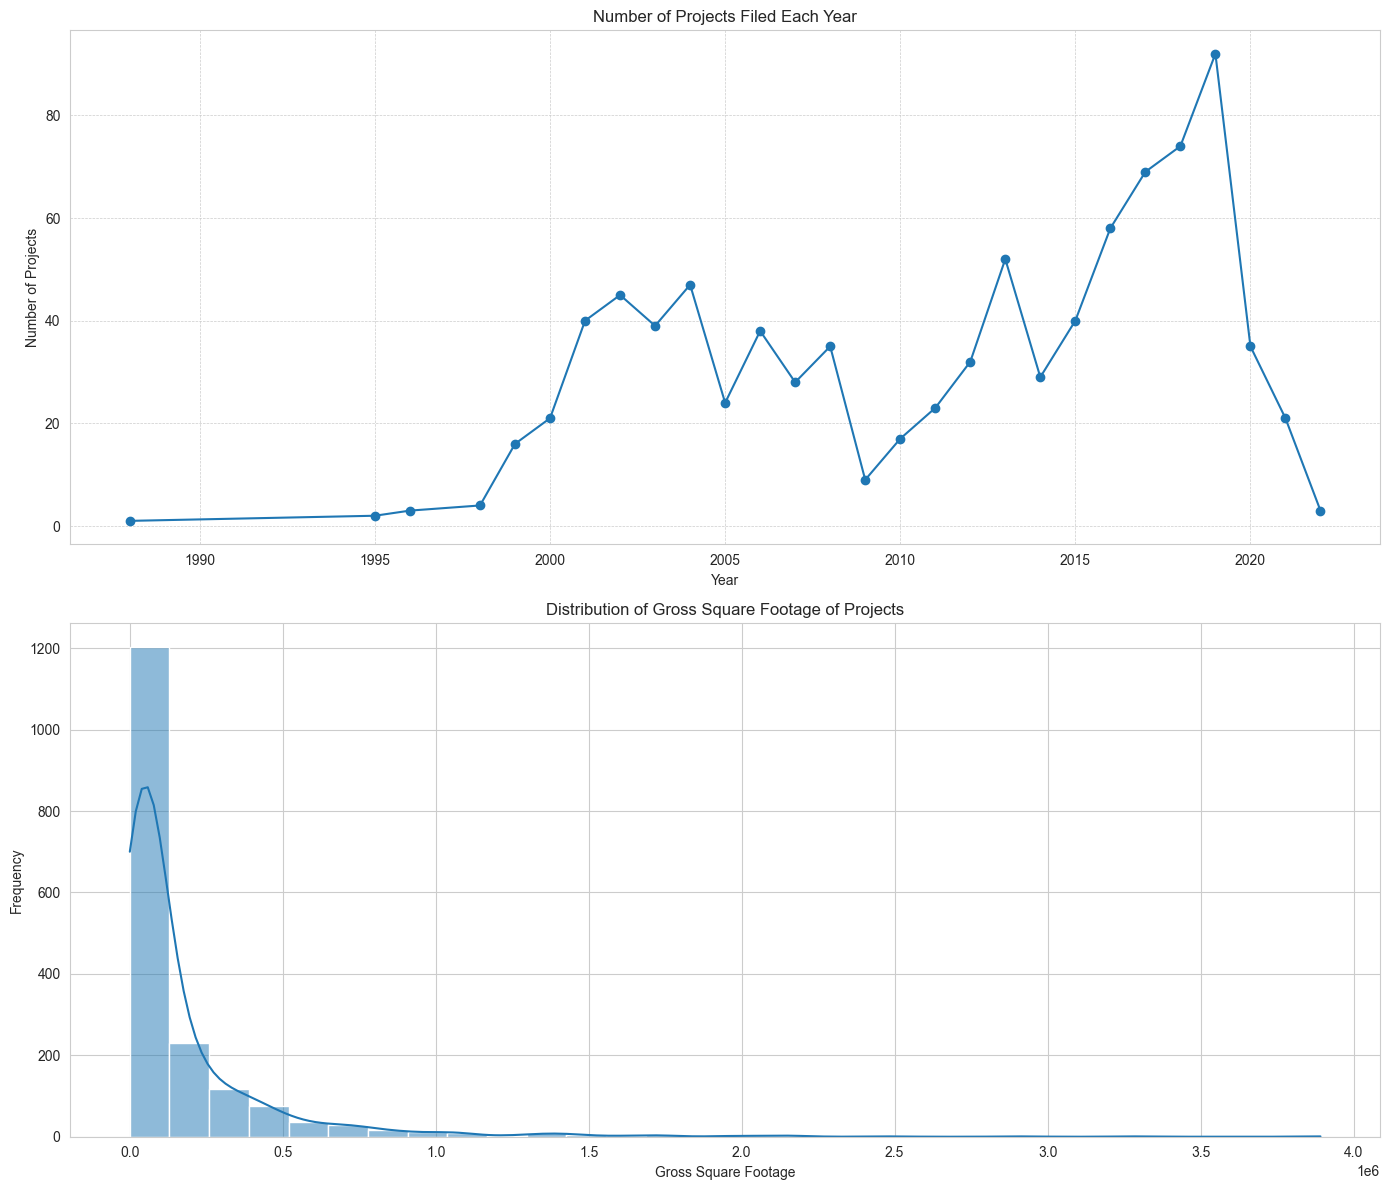

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set_style("whitegrid")

# Create a subplot of 2 plots
fig, ax = plt.subplots(2, 1, figsize=(14, 12))

# 1. Time series plot showing the number of projects filed each year
data['Filed_Year'] = data['Filed_Date'].dt.year
projects_per_year = data.groupby('Filed_Year').size()
projects_per_year.plot(kind='line', marker='o', ax=ax[0])
ax[0].set_title("Number of Projects Filed Each Year")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Number of Projects")
ax[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# 2. Histogram showing the distribution of Gross_Square_Footage
sns.histplot(data['Gross_Square_Footage'], bins=30, kde=True, ax=ax[1])
ax[1].set_title("Distribution of Gross Square Footage of Projects")
ax[1].set_xlabel("Gross Square Footage")
ax[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

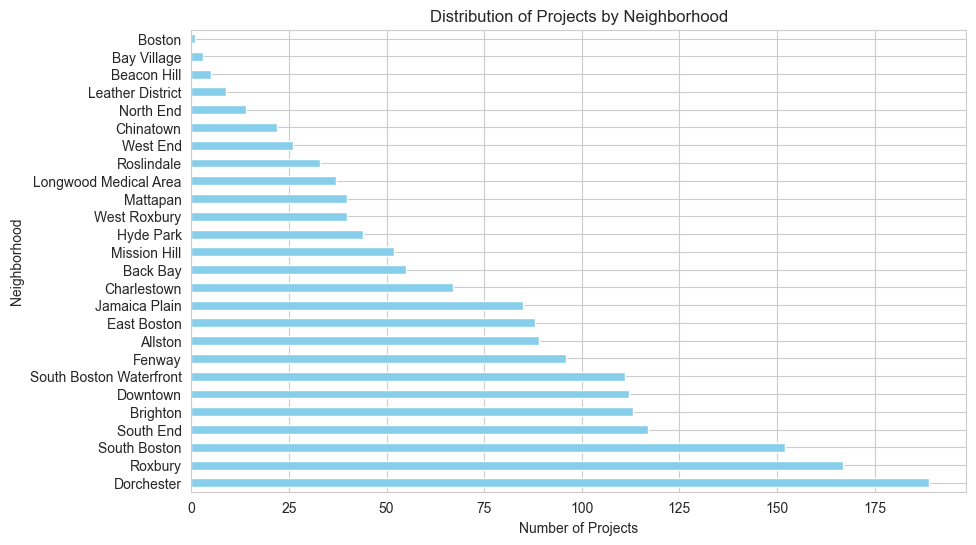

In [22]:
# Create the Distribution of Projects by Neighborhood visualization
plt.figure(figsize=(10, 6))
data['Neighborhood'].value_counts().plot(kind='barh', color='skyblue')
plt.title("Distribution of Projects by Neighborhood")
plt.xlabel("Number of Projects")
plt.ylabel("Neighborhood")
plt.show()


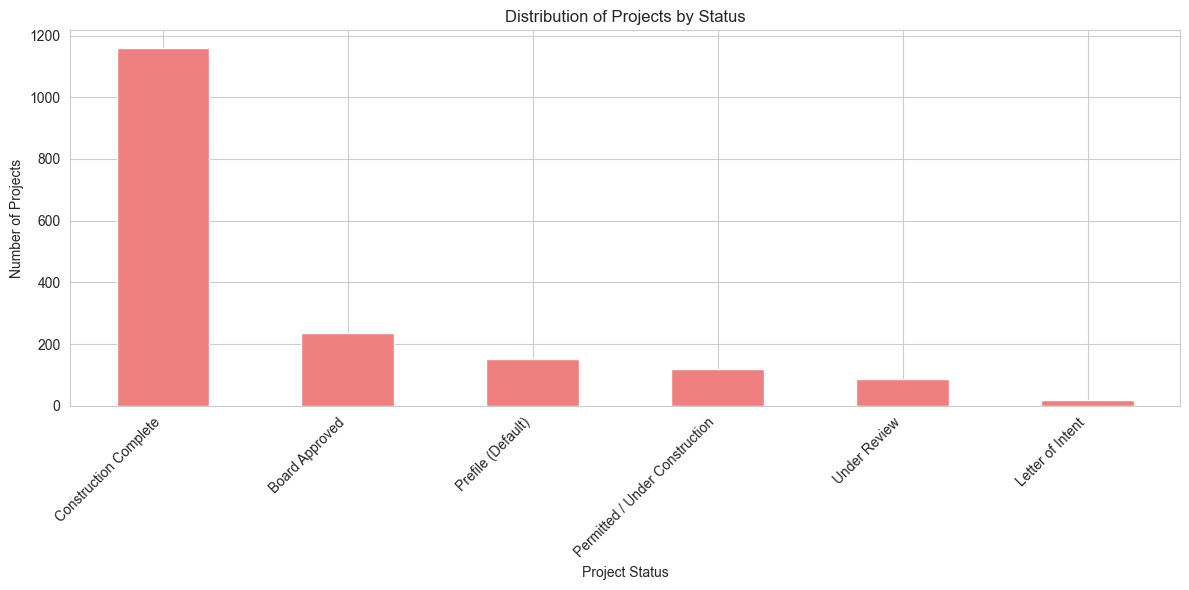

In [24]:
# Create the Distribution of Projects by Status visualization
plt.figure(figsize=(12, 6))
data['Project_Status'].value_counts().plot(kind='bar', color='lightcoral')
plt.title("Distribution of Projects by Status")
plt.xlabel("Project Status")
plt.ylabel("Number of Projects")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()
